In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [4]:

# 1. Features and target
target = 'price'
features = df.select_dtypes(include=np.number).columns.drop(target)

X = df[features]
y = np.log1p(df[target])


In [5]:

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize LGBMRegressor
model = LGBMRegressor(
    objective='regression',
    metric='rmse',
    learning_rate=0.05,
    num_leaves=31,
    n_estimators=1000,
    random_state=42
)


In [6]:

# 4. Fit model with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric='rmse',
)

# 5. Predictions
y_pred = model.predict(X_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 5124, number of used features: 22
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 16.366840


In [7]:

# 6. Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R^2: {r2:.2f}")



Test RMSE: 0.24
Test R^2: 0.95


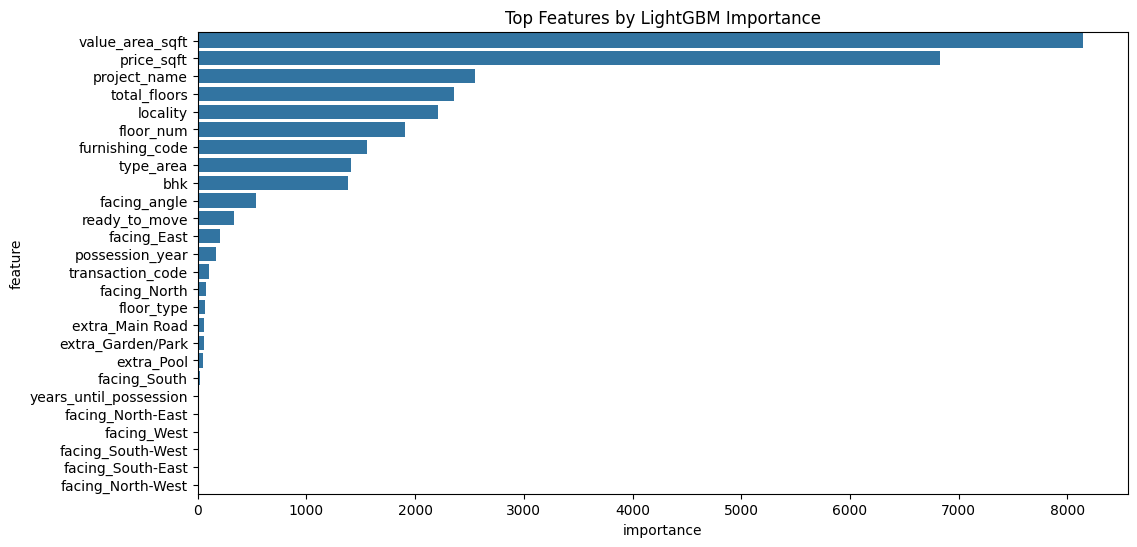

In [8]:
# 7. Feature importance
importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='importance', y='feature', data=importance)
plt.title('Top Features by LightGBM Importance')
plt.show()

In [9]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define model with eval_metric in constructor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=1,
    eval_metric='rmse'   # move eval_metric here
)

# 2. Fit model (early stopping works)
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)]
)

# 3. Predictions
y_pred_xgb = xgb_model.predict(X_test)

# 4. Evaluation
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Test RMSE: {rmse_xgb:.2f}")
print(f"XGBoost Test R^2: {r2_xgb:.2f}")

# 5. Feature importance
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print(importance_df.head(10))


[0]	validation_0-rmse:0.98600
[1]	validation_0-rmse:0.94214
[2]	validation_0-rmse:0.90018
[3]	validation_0-rmse:0.86057
[4]	validation_0-rmse:0.82610
[5]	validation_0-rmse:0.79070
[6]	validation_0-rmse:0.75694
[7]	validation_0-rmse:0.72783
[8]	validation_0-rmse:0.69805
[9]	validation_0-rmse:0.66952
[10]	validation_0-rmse:0.64357
[11]	validation_0-rmse:0.61854
[12]	validation_0-rmse:0.59446
[13]	validation_0-rmse:0.57159
[14]	validation_0-rmse:0.55049
[15]	validation_0-rmse:0.53064
[16]	validation_0-rmse:0.51968
[17]	validation_0-rmse:0.50163
[18]	validation_0-rmse:0.48444
[19]	validation_0-rmse:0.46828
[20]	validation_0-rmse:0.45311
[21]	validation_0-rmse:0.43953
[22]	validation_0-rmse:0.42613
[23]	validation_0-rmse:0.41832
[24]	validation_0-rmse:0.40765
[25]	validation_0-rmse:0.39585
[26]	validation_0-rmse:0.38479
[27]	validation_0-rmse:0.37472
[28]	validation_0-rmse:0.36495
[29]	validation_0-rmse:0.35603
[30]	validation_0-rmse:0.34793
[31]	validation_0-rmse:0.34055
[32]	validation_0-